In [1]:
customer_df = read.csv('Wholesale_customers_data.csv')

In [2]:
customer_df$Channel <- NULL
customer_df$Region <- NULL

In [3]:
dim(customer_df)

[1] 440   6

In the next few notebooks, we are going to do some Unsupervised Exploration of the `customer` table in our Database.

> What does a data scientist do? PCA on the `customer` table. - Joshua Cook

# Basic Stats

In [4]:
install.packages('moments')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
library(moments)

In [6]:
skewness(customer_df)

Fresh             Milk          Grocery           Frozen 
        2.552583         4.039922         3.575187         5.887826 
Detergents_Paper     Delicatessen 
        3.619458        11.113534

In [7]:
stats = data.frame(feature=colnames(customer_df))
stats['mean_'] = sapply(customer_df, mean)
stats['sd_'] = sapply(customer_df, sd)
stats['skewness_'] = sapply(customer_df, skewness)
stats

feature,mean_,sd_,skewness_
Fresh,12000.298,12647.329,2.552583
Milk,5796.266,7380.377,4.039922
Grocery,7951.277,9503.163,3.575187
Frozen,3071.932,4854.673,5.887826
Detergents_Paper,2881.493,4767.854,3.619458
Delicatessen,1524.870,2820.106,11.113534


# Sampling the Dataset 

In this notebook, we begin to explore the `customer` table by sampling the table. First, let's sample three random points and examine them. 

In [8]:
library(dplyr, warn.conflicts = FALSE)

In [9]:
set.seed(42)

In [10]:
sample = sample_n(customer_df, 3)

In [11]:
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
403,26539,4753,5091,220,10,340
412,2126,3289,3281,1535,235,4365
126,76237,3473,7102,16538,778,918


In [12]:
stats

feature,mean_,sd_,skewness_
Fresh,12000.298,12647.329,2.552583
Milk,5796.266,7380.377,4.039922
Grocery,7951.277,9503.163,3.575187
Frozen,3071.932,4854.673,5.887826
Detergents_Paper,2881.493,4767.854,3.619458
Delicatessen,1524.870,2820.106,11.113534


# Sampling for a Statistical Description

We are able to take the mean and standard deviation of the data, but what if we want to visualize it? 

Of course, this dataset is small, but we might want techniques that work even when the dataset is very large.

Let's start by looking at 1% of the data. 

In [13]:
sample_1pct_1 = sample_n(customer_df, 5)

In [14]:
colMeans(sample_1pct_1)

Fresh             Milk          Grocery           Frozen 
          8781.2           3861.4           4527.6           1661.6 
Detergents_Paper     Delicatessen 
          1512.2           1484.4

### How does this compare to the actual mean?

In [15]:
colMeans(sample_1pct_1) - stats$mean_

Fresh             Milk          Grocery           Frozen 
     -3219.09773      -1934.86591      -3423.67727      -1410.33182 
Detergents_Paper     Delicatessen 
     -1369.29318        -40.47045

Let's think about this in terms of the standard deviations.

In [16]:
(colMeans(sample_1pct_1) - stats$mean_)/stats$sd_

Fresh             Milk          Grocery           Frozen 
     -0.25452787      -0.26216355      -0.36026714      -0.29051014 
Detergents_Paper     Delicatessen 
     -0.28719274      -0.01435069

### Let's try it again

In [17]:
sample_2pct_1 = sample_n(customer_df, 5)

In [18]:
colMeans(sample_2pct_1)

Fresh             Milk          Grocery           Frozen 
         12950.0           9764.0          12699.0           2226.2 
Detergents_Paper     Delicatessen 
          5115.4            669.0

### How does this compare to the actual mean?

In [19]:
colMeans(sample_2pct_1) - stats$mean_

Fresh             Milk          Grocery           Frozen 
        949.7023        3967.7341        4747.7227        -845.7318 
Detergents_Paper     Delicatessen 
       2233.9068        -855.8705

Let's think about this in terms of the standard deviations.

In [20]:
(colMeans(sample_2pct_1) - stats$mean_)/stats$sd_

Fresh             Milk          Grocery           Frozen 
      0.07509113       0.53760587       0.49959396      -0.17420983 
Detergents_Paper     Delicatessen 
      0.46853503      -0.30348876

### How does it do?

### Repeatedly Sample

Let's do it 10 times.

In [22]:
sample_means = colMeans(sample_n(customer_df, 5))

In [23]:
for (i in 1:9) {
    sample_means = (sample_means*(i) + colMeans(sample_n(customer_df, 5)))/(i+1)
}

In [24]:
sample_means

Fresh             Milk          Grocery           Frozen 
         9542.72          4965.72          6566.54          2638.18 
Detergents_Paper     Delicatessen 
         2332.12          1247.68

In [25]:
(sample_means-stats$mean_)/stats$sd_

Fresh             Milk          Grocery           Frozen 
     -0.19431595      -0.11253434      -0.14571331      -0.08934727 
Detergents_Paper     Delicatessen 
     -0.11522440      -0.09829079

And 50 times.

In [26]:
sample_means = colMeans(sample_n(customer_df, 5))

In [27]:
for (i in 1:49) {
    sample_means = (sample_means*(i) + colMeans(sample_n(customer_df, 5)))/(i+1)
}

In [28]:
(sample_means-stats$mean_)/stats$sd_

Fresh             Milk          Grocery           Frozen 
    -0.012928084      0.252463803      0.197934810     -0.081256099 
Detergents_Paper     Delicatessen 
     0.221894949     -0.004724097

And 100 times.

In [29]:
sample_means = colMeans(sample_n(customer_df, 5))

for (i in 1:99) {
    sample_means = (sample_means*(i) + colMeans(sample_n(customer_df, 5)))/(i+1)
}

(sample_means-stats$mean_)/stats$sd_

Fresh             Milk          Grocery           Frozen 
    -0.054904062     -0.025210081     -0.018653292     -0.050510879 
Detergents_Paper     Delicatessen 
    -0.005013824     -0.025824014

### What do we notice?

### Take a larger sample

Totally different. Which makes sense ... we're only taking 1% of the data!

What if we take a sample of 10% of the data?

In [30]:
sample_means = colMeans(sample_n(customer_df, 44))

(sample_means-stats$mean_)/stats$sd_

Fresh             Milk          Grocery           Frozen 
      0.19586044       0.11202710       0.09924399       0.05823817 
Detergents_Paper     Delicatessen 
      0.09996063       0.10720664

### Is this sample good enough for plotting?

https://stats.stackexchange.com/questions/2541/is-there-a-reference-that-suggest-using-30-as-a-large-enough-sample-size

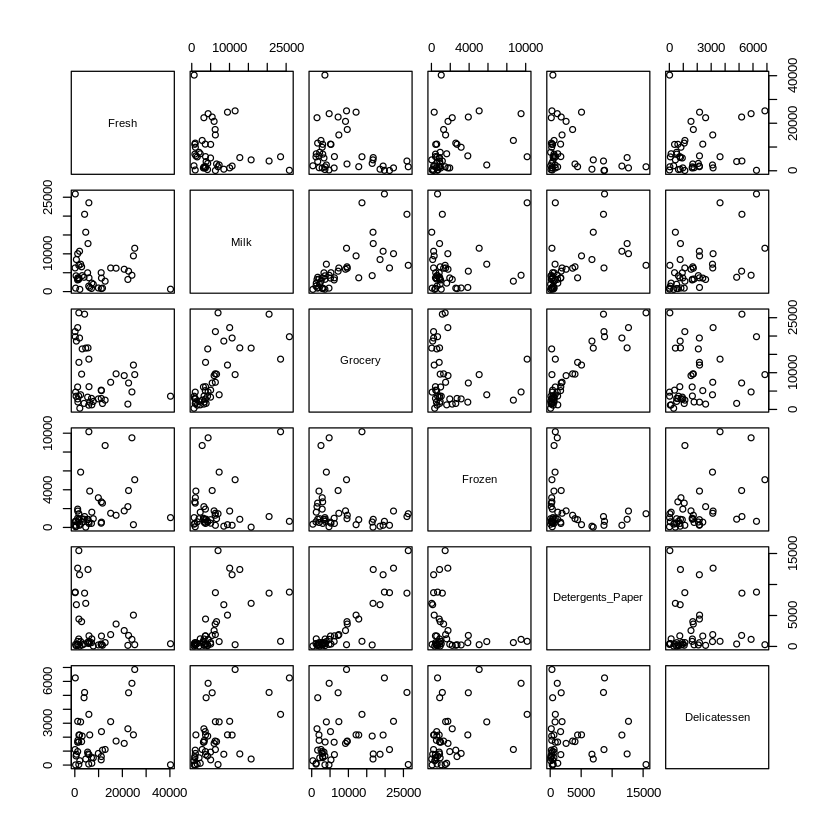

In [31]:
pairs(sample_n(customer_df, 44))